# Preprocessing

In [103]:
#import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from copy import copy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
import warnings
warnings.filterwarnings('ignore')

In [104]:
#read data
data = pd.read_csv("/data01.csv") 

#Data Preprocessing to remove null values
SI = SimpleImputer(missing_values=np.nan, strategy='mean')
Data_SI = data.select_dtypes(include='float64').columns
SI.fit(data[Data_SI])
data[Data_SI] = SI.transform(data[Data_SI])

#Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(scaler.fit_transform(data))
data.columns = ['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']
data['outcome'] = data['outcome'].astype('int')

In [105]:
data.head(5)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,0.248990,0,0.6625,0.0,0.264576,0.0,0.0,0.0,1.0,...,0.601029,0.179679,0.683867,0.346185,0.455782,0.285714,0.238714,0.000000,0.266124,0.666667
1,0.0,0.397026,0,0.7000,1.0,0.183812,0.0,0.0,0.0,0.0,...,0.604495,0.344118,0.430145,0.254886,0.182398,0.275510,0.591427,0.000000,0.742016,0.666667
2,0.0,0.095991,0,0.8000,1.0,0.144350,0.0,0.0,0.0,0.0,...,0.650050,0.368627,0.605553,0.178313,0.283285,0.363265,0.508892,0.000000,0.660614,0.333333
3,0.0,0.304535,0,0.3000,1.0,0.763099,0.0,0.0,0.0,0.0,...,0.594790,0.653394,0.279339,0.303270,0.203110,0.571429,0.738714,0.012766,0.704446,0.666667
4,0.0,0.381766,0,0.7000,1.0,0.201673,1.0,0.0,0.0,0.0,...,0.549037,0.478431,0.573439,0.452209,0.093537,0.326531,0.262654,0.012766,0.391359,0.666667


In [106]:
X = data.drop(columns='outcome')
y = data['outcome']
    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
reduced_columns = list(featureScores.nlargest(10,'Score').iloc[:,0])

#Reduce columns in X
X = X[reduced_columns]

print(reduced_columns)

['Renal failure', 'deficiencyanemias', 'atrialfibrillation', 'Urea nitrogen', 'Lactic acid', 'depression', 'Urine output', 'Bicarbonate', 'Anion gap', 'INR']


In [107]:
X

,Renal failure,deficiencyanemias,atrialfibrillation,Urea nitrogen,Lactic acid,depression,Urine output,Bicarbonate,Anion gap,INR
0,1.0,1.0,0.0,0.285453,0.000000,0.0,0.244331,0.238714,0.346185,0.017208
1,0.0,1.0,0.0,0.095760,0.000000,0.0,0.161565,0.591427,0.254886,0.100923
2,1.0,1.0,0.0,0.182233,0.000000,0.0,0.274943,0.508892,0.178313,0.010516
3,0.0,0.0,0.0,0.063485,0.012766,0.0,0.993197,0.738714,0.303270,0.240280
4,1.0,1.0,0.0,0.240694,0.012766,0.0,0.505102,0.262654,0.452209,0.100923
...,...,...,...,...,...,...,...,...,...,...
1172,1.0,0.0,1.0,0.272665,0.172778,1.0,0.215337,0.426813,0.716007,0.043977
1173,1.0,0.0,1.0,0.186344,0.172778,1.0,0.215337,0.218988,0.610892,0.109943
1174,1.0,1.0,1.0,0.160311,0.172778,0.0,0.013379,0.459644,0.390361,0.030593
1175,1.0,1.0,0.0,0.192738,0.172778,1.0,0.293084,0.330882,0.483133,0.082218


In [108]:
#split full dataset into train and test
def spliting_data(data):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

#define methods
def sharding(n_shards, X_train, y_train, method='random'):
    #determine the method of sharding
    if (method=='random'):
        df = list(zip(np.array(X_train), np.array(y_train)))
        np.random.shuffle(df)
        X_train, y_train = [], []
        for x, y in df:
            X_train.append(x)
            y_train.append(y)
        X_train, y_train = pd.DataFrame(X_train), pd.DataFrame(y_train)
        
    elif (method=='fixed'):
        df = pd.DataFrame(X_train)
        df['outcome'] = y_train
        df = df.sort_values(by=['Urea nitrogen'])
        X_train = df.iloc[:,:-1]
        y_train = df.iloc[:,-1:]

    #split train data into shards
    X_train_shards = list()
    y_train_shards = list()
    X_val_shards = list()
    y_val_shards = list()
    offset = int(y_train.size / n_shards)
    for i in range(n_shards):
        #split each shard into train and validate
        x = X_train[i*offset : (i+1)*offset]
        y = y_train[i*offset : (i+1)*offset]
        X_t, X_v, y_t, y_v = train_test_split(x, y, test_size=0.2, random_state=0)
        X_train_shards.append(X_t)
        y_train_shards.append(y_t)
        X_val_shards.append(X_v)
        y_val_shards.append(y_v)
        
    return X_train_shards, y_train_shards, X_val_shards, y_val_shards

def slicing(n_slices, classifier, X, Y):
    increm_models = list()
    offset = int(Y.size / n_slices)
    for s in range(n_slices):
        x = np.array(X.iloc[s*offset : (s+1)*offset,:]).reshape(offset,X.shape[1])
        y = np.array(Y.iloc[s*offset : (s+1)*offset,:]).reshape(offset,-1)
        increm_model = classifier.partial_fit(x, y,classes=[0,1])
        increm_models.append(increm_model)
    return increm_models
    
    
def train_model(model, X_train, X_test, y_train, y_test):
    # fit the model
    model.fit(X_train, y_train)
    # calculate accuracy
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    return model, acc

def ensemble_prediction(models, scores, X_test, y_test):
    probabilities = list()
    avg = sum(scores)
    for i in range(len(models)):
        prob = models[i].predict_proba(X_test)
        weighted_prob = np.dot(prob, scores[i]/avg)
        probabilities.append(weighted_prob)
    summed = np.sum(probabilities, axis=0)
    pred = np.argmax(summed, axis=1)
    acc = accuracy_score(y_test, pred)
    return pred, acc

def normalize(weights):
    return [i/sum(weights) for i in weights]

def weights_estimate(models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices):
    weights = list()
    probabilities = list()
    for i in range(len(models)):
        # fit the model
        incremnt_model = slicing(n_slices, models[i], X_train_shards[i], y_train_shards[i])#models[i].fit(X_train_shards[i], y_train_shards[i])
        # calculate accuracy
        yhat = incremnt_model[-1].predict(X_val_shards[i])
        acc = accuracy_score(y_val_shards[i], yhat)
        # store the performance
        weights.append(acc)
    weights = normalize(weights)
    return weights, models


def print_accuracy(desc, acc):
    print('Accuracy on test set for the {}: {:.2f}%'.format(desc, acc*100))
    
def plot_results(x, y, name):
    plt.figure(figsize=(8,6))
    title = {'family': 'times',
            'color':  'darkblue',
            'weight': 'bold',
            'size': 20,
            }
    labels = {'family': 'times',
             'color':  'black',
             'weight': 'normal',
             'size': 16,
             }
    plt.title(name, fontdict=title)
    plt.xlabel('Number of Shards', fontdict=labels)
    plt.ylabel('Accuracy (%)', fontdict=labels)
    plt.plot(x, y, c='darkblue')
    
def plot_comparision_FR(x, cls1, cls2 , name):
    plt.figure(figsize=(8,6))
    title = {'family': 'times',
            'color':  'darkblue',
            'weight': 'bold',
            'size': 20,
            }
    labels = {'family': 'times',
             'color':  'black',
             'weight': 'normal',
             'size': 16,
             }
    plt.title(name, fontdict=title)
    plt.xlabel('Number of Shards', fontdict=labels)
    plt.ylabel('Accuracy (%)', fontdict=labels)
    plt.plot(x, cls1, c='blue', linestyle='dashed')
    plt.plot(x, cls2, c='red', linestyle='dashed')
    plt.legend(['fixed sharding', 'random sharding'])
    
def plot_comparision_SS(x, y8, y16, y32, yfull, name):
    plt.figure(figsize=(8,8))
    title = {'family': 'times',
            'color':  'darkblue',
            'weight': 'bold',
            'size': 20,
            }
    labels = {'family': 'times',
             'color':  'black',
             'weight': 'normal',
             'size': 16,
             }
    plt.title(name, fontdict=title)
    plt.xlabel('Number of Shards', fontdict=labels)
    plt.ylabel('Accuracy (%)', fontdict=labels)
    plt.plot(x, y8, c='red', marker='o', alpha=.7, linestyle='dotted')
    plt.plot(x, y16, c='blue', marker='o', alpha=.7, linestyle='dotted')
    plt.plot(x, y32, c='green', marker='o', alpha=.7, linestyle='dotted')
    plt.plot(x, yfull, c='black', marker='o', alpha=.7, linestyle='dotted')

    plt.legend(['No. slices = 8', 'No. slices = 16', 'No. slices = 32', 'No. slices = size of shard'],
              loc='lower right')

r = range(2,21)

# Full Dataset Training

**SGD Classifier**

In [168]:
X_train, X_test, y_train, y_test = spliting_data(data)
SGDClassifier_model, SGDClassifier_acc = train_model(SGDClassifier(), 
                                                     X_train, X_test, y_train, y_test)
print_accuracy('full dataset (SGD classifier)', SGDClassifier_acc)

Accuracy on test set for the full dataset (SGD classifier): 92.37%


**Multinomial NB**

In [110]:
X_train, X_test, y_train, y_test = spliting_data(data)
MultinomialNB_model, MultinomialNB_acc = train_model(MultinomialNB(), 
                                                   X_train, X_test, y_train, y_test)
print_accuracy('full dataset (Multinomial NB classifier)', MultinomialNB_acc)

Accuracy on test set for the full dataset (Multinomial NB classifier): 89.41%


**Bernoulli NB**

In [111]:
X_train, X_test, y_train, y_test = spliting_data(data)
BernoulliNB_model, BernoulliNB_acc = train_model(BernoulliNB(), 
                                                   X_train, X_test, y_train, y_test)
print_accuracy('full dataset (Bernoulli NB classifier)', BernoulliNB_acc)

Accuracy on test set for the full dataset (Bernoulli NB classifier): 89.83%


# Sharded Dataset Training 

**SGD Classifier (fixed sharding) - number of slices = 8**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - fixed sharding): 90.68%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - fixed sharding): 90.68%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - fixed sharding): 90.25%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - fixed sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - fixed sharding): 89.

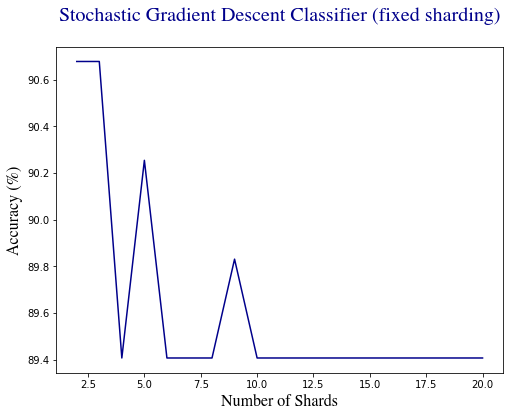

In [112]:
#initializations
SGD_acc_fixed_8 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=8)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_fixed_8.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, SGD_acc_fixed_8, 'Stochastic Gradient Descent Classifier (fixed sharding)\n')

**SGD Classifier (fixed sharding) - number of slices = 16**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - fixed sharding): 90.25%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - fixed sharding): 90.68%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - fixed sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - fixed sharding): 89.

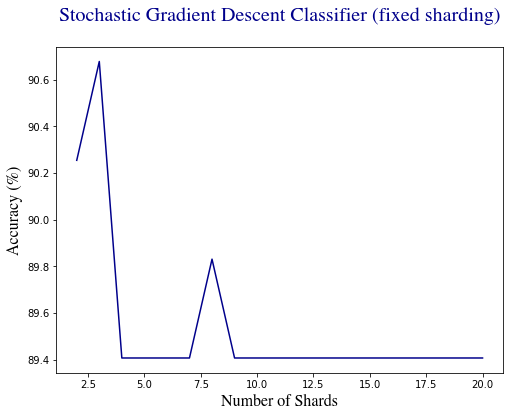

In [115]:
#initializations
SGD_acc_fixed_16 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=16)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_fixed_16.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, SGD_acc_fixed_16, 'Stochastic Gradient Descent Classifier (fixed sharding)\n')

**SGD Classifier (fixed sharding) - number of slices = 32**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - fixed sharding): 90.25%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - fixed sharding): 89.

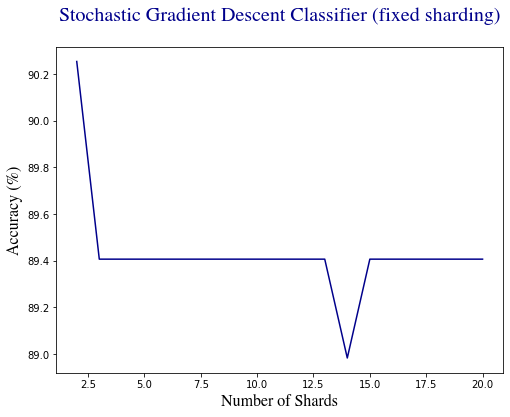

In [117]:
#initializations
SGD_acc_fixed_32 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=32)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_fixed_32.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, SGD_acc_fixed_32, 'Stochastic Gradient Descent Classifier (fixed sharding)\n')

**SGD Classifier (fixed sharding) - number of slices = size of shard**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - fixed sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - fixed sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - fixed sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - fixed sharding): 89.41%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - fixed sharding): 89.

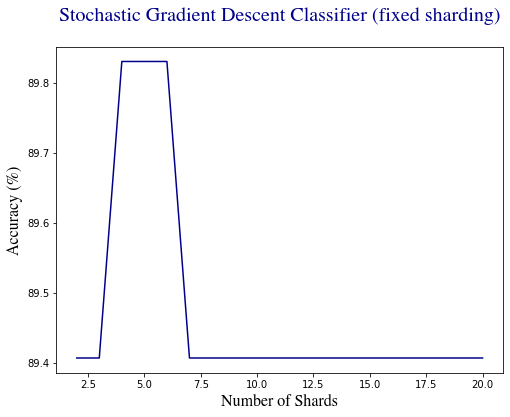

In [122]:
#initializations
SGD_acc_fixed_full = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_fixed_full.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, SGD_acc_fixed_full, 'Stochastic Gradient Descent Classifier (fixed sharding)\n')

**SGD Classifier (random sharding) - number of slices = 8**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - random sharding): 91.10%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - random sharding): 90.25%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - random sharding): 90.68%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - random sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - random sharding): 90.25%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - random sharding): 89.83%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - random sha

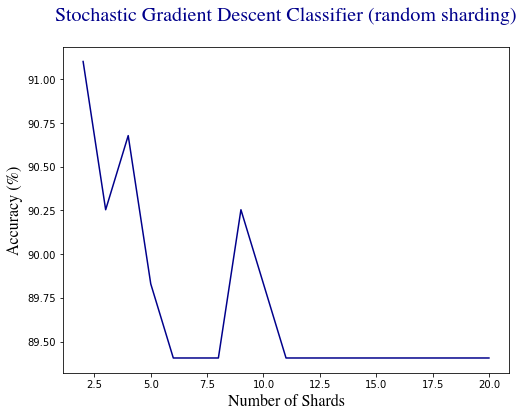

In [126]:
#initializations
SGD_acc_random_8 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=8)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_random_8.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, SGD_acc_random_8, 'Stochastic Gradient Descent Classifier (random sharding)\n')

**SGD Classifier (random sharding) - number of slices = 16**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - random sharding): 91.10%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - random sharding): 88.14%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - random sharding): 88.98%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - random sharding): 90.68%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - random sharding): 88.56%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - random sharding): 85.17%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - random sharding): 89.83%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - random sha

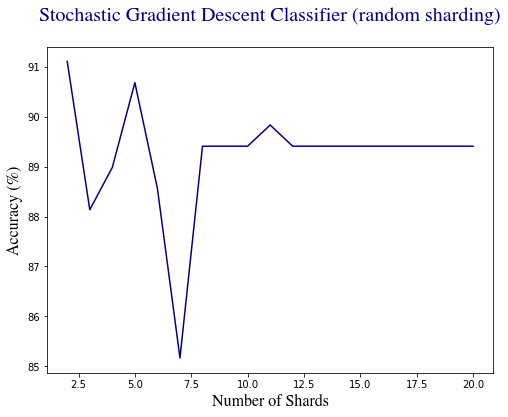

In [129]:
#initializations
SGD_acc_random_16 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=16)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_random_16.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, SGD_acc_random_16, 'Stochastic Gradient Descent Classifier (random sharding)\n')

**SGD Classifier (random sharding) - number of slices = 32**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - random sharding): 91.10%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - random sharding): 90.25%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - random sharding): 90.25%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - random sharding): 82.20%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - random sharding): 91.10%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - random sharding): 89.83%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - random sharding): 86.02%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - random sha

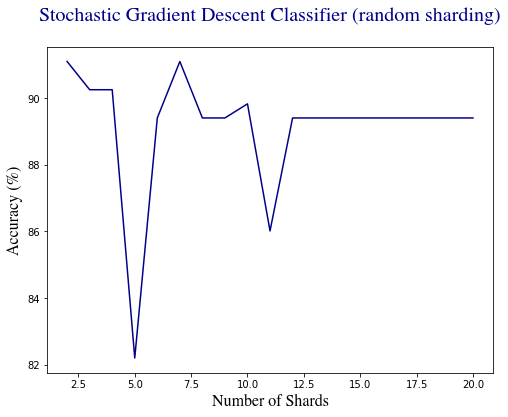

In [130]:
#initializations
SGD_acc_random_32 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=32)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_random_32.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, SGD_acc_random_32, 'Stochastic Gradient Descent Classifier (random sharding)\n')

**SGD Classifier (random sharding) - number of slices = size of shard**

Accuracy on test set for the 2 shards of dataset (SGD Classifier - random sharding): 91.10%
Accuracy on test set for the 3 shards of dataset (SGD Classifier - random sharding): 90.68%
Accuracy on test set for the 4 shards of dataset (SGD Classifier - random sharding): 86.02%
Accuracy on test set for the 5 shards of dataset (SGD Classifier - random sharding): 90.68%
Accuracy on test set for the 6 shards of dataset (SGD Classifier - random sharding): 90.25%
Accuracy on test set for the 7 shards of dataset (SGD Classifier - random sharding): 91.10%
Accuracy on test set for the 8 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (SGD Classifier - random sharding): 89.41%
Accuracy on test set for the 12 shards of dataset (SGD Classifier - random sha

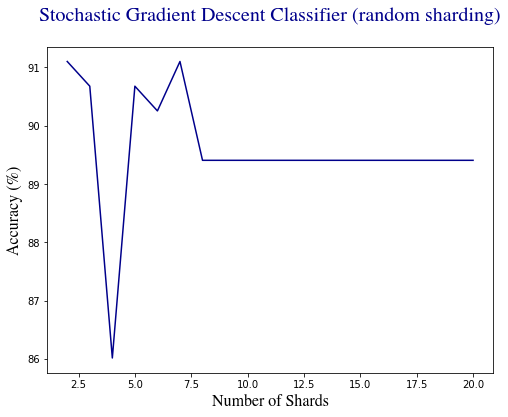

In [131]:
#initializations
SGD_acc_random_full = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [SGDClassifier(loss = 'log') for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_random_full.append(acc*100)
    print_accuracy('{} shards of dataset (SGD Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, SGD_acc_random_full, 'Stochastic Gradient Descent Classifier (random sharding)\n')

**Multinomial NB Classifier (fixed sharding) - number of slices = 8**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classifier - fi

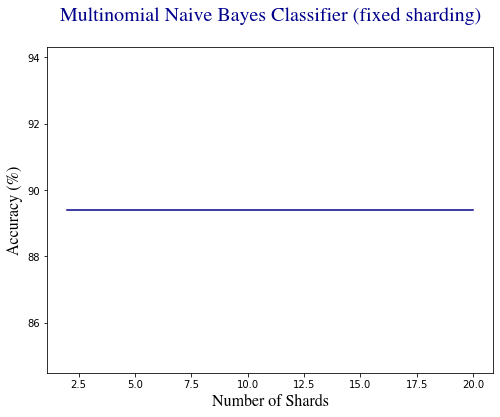

In [132]:
#initializations
MultinomialNB_acc_fixed_8 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=8)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_fixed_8.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, MultinomialNB_acc_fixed_8, 'Multinomial Naive Bayes Classifier (fixed sharding)\n')

**Multinomial NB Classifier (fixed sharding) - number of slices = 16**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classifier - fi

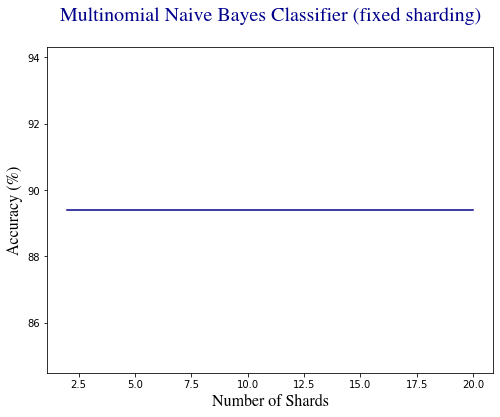

In [133]:
#initializations
MultinomialNB_acc_fixed_16 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=16)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_fixed_16.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, MultinomialNB_acc_fixed_16, 'Multinomial Naive Bayes Classifier (fixed sharding)\n')

**Multinomial NB Classifier (fixed sharding) - number of slices = 32**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classifier - fi

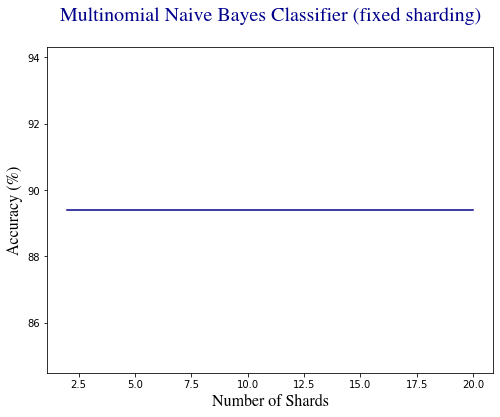

In [134]:
#initializations
MultinomialNB_acc_fixed_32 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=32)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_fixed_32.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, MultinomialNB_acc_fixed_32, 'Multinomial Naive Bayes Classifier (fixed sharding)\n')

**Multinomial NB Classifier (fixed sharding) - number of slices = size of shard**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classifier - fi

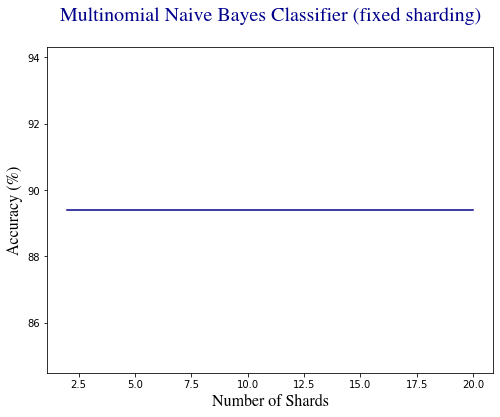

In [135]:
#initializations
MultinomialNB_acc_fixed_full = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_fixed_full.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, MultinomialNB_acc_fixed_full, 'Multinomial Naive Bayes Classifier (fixed sharding)\n')

**Multinomial NB Classifier (random sharding) - number of slices = 8**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classi

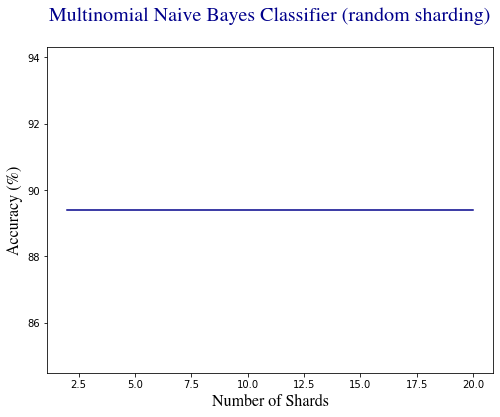

In [136]:
#initializations
MultinomialNB_acc_random_8 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=8)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_random_8.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, MultinomialNB_acc_random_8, 'Multinomial Naive Bayes Classifier (random sharding)\n')

**Multinomial NB Classifier (random sharding) - number of slices = 16**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classi

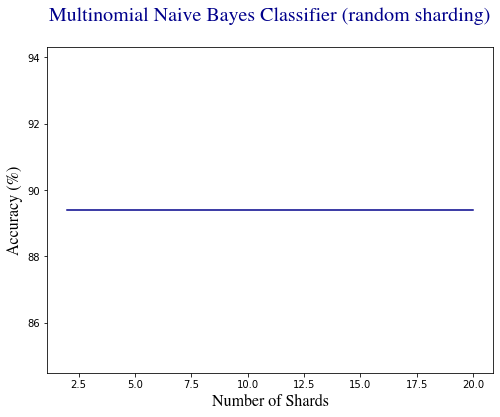

In [137]:
#initializations
MultinomialNB_acc_random_16 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=16)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_random_16.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, MultinomialNB_acc_random_16, 'Multinomial Naive Bayes Classifier (random sharding)\n')

**Multinomial NB Classifier (random sharding) - number of slices = 32**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classi

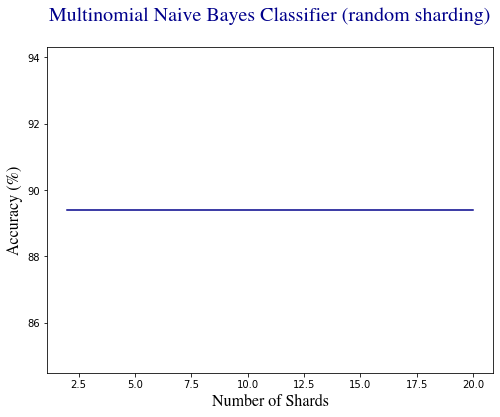

In [138]:
#initializations
MultinomialNB_acc_random_32 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=32)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_random_32.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, MultinomialNB_acc_random_32, 'Multinomial Naive Bayes Classifier (random sharding)\n')

**Multinomial NB Classifier (random sharding) - number of slices = size of shard**

Accuracy on test set for the 2 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 3 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 4 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 5 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 6 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 7 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 8 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Multinomial NB Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Multinomial NB Classi

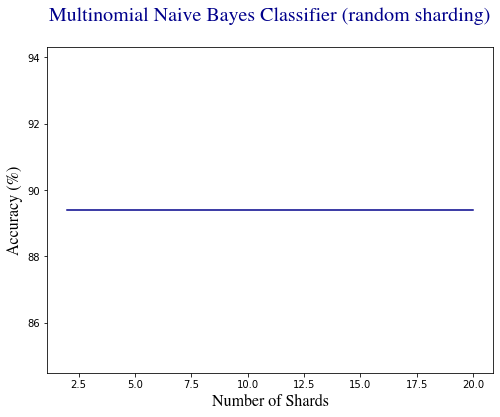

In [139]:
#initializations
MultinomialNB_acc_random_full = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [MultinomialNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_random_full.append(acc*100)
    print_accuracy('{} shards of dataset (Multinomial NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, MultinomialNB_acc_random_full, 'Multinomial Naive Bayes Classifier (random sharding)\n')

**Bernoulli NB Classifier (fixed sharding) - number of slices = 8**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41

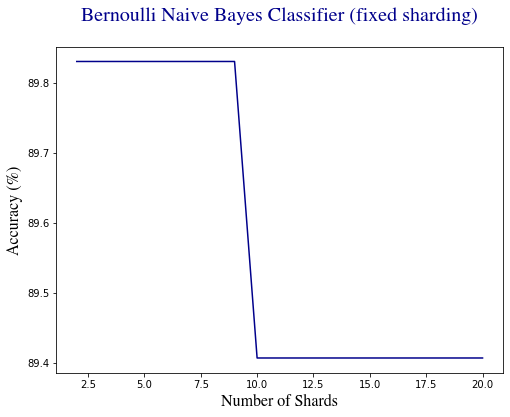

In [140]:
#initializations
BernoulliNB_acc_fixed_8 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=8)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_fixed_8.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, BernoulliNB_acc_fixed_8, 'Bernoulli Naive Bayes Classifier (fixed sharding)\n')

**Bernoulli NB Classifier (fixed sharding) - number of slices = 16**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41

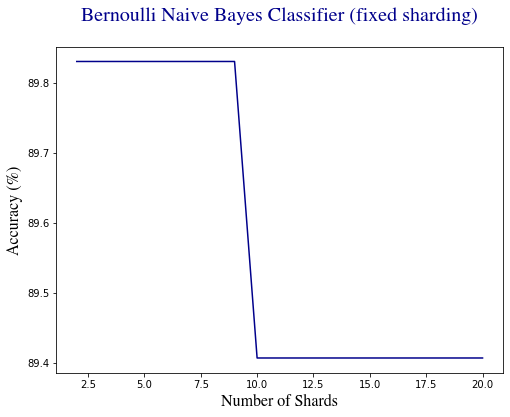

In [141]:
#initializations
BernoulliNB_acc_fixed_16 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=16)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_fixed_16.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, BernoulliNB_acc_fixed_16, 'Bernoulli Naive Bayes Classifier (fixed sharding)\n')

**Bernoulli NB Classifier (fixed sharding) - number of slices = 32**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41

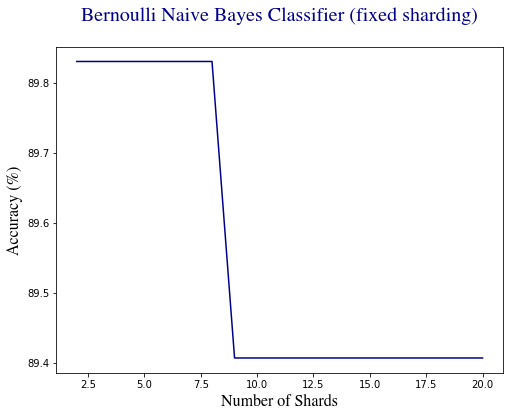

In [142]:
#initializations
BernoulliNB_acc_fixed_32 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=32)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_fixed_32.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, BernoulliNB_acc_fixed_32, 'Bernoulli Naive Bayes Classifier (fixed sharding)\n')

**Bernoulli NB Classifier (fixed sharding) - number of slices = size of shard**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - fixed sharding): 89.41

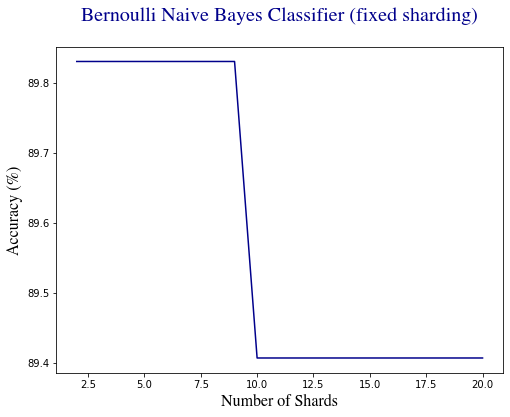

In [143]:
#initializations
BernoulliNB_acc_fixed_full = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_fixed_full.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - fixed sharding)'.format(n_shards), acc)

plot_results(r, BernoulliNB_acc_fixed_full, 'Bernoulli Naive Bayes Classifier (fixed sharding)\n')

**Bernoulli NB Classifier (random sharding) - number of slices = 8**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - random shardi

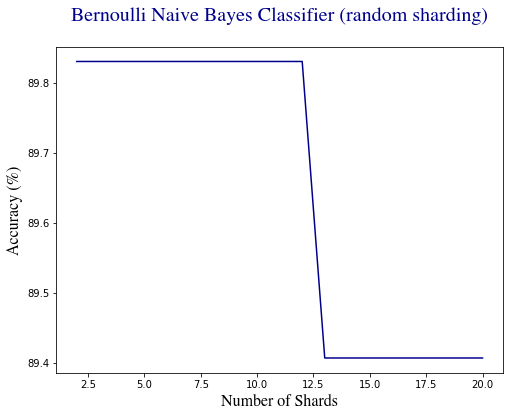

In [144]:
#initializations
BernoulliNB_acc_random_8 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=8)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_random_8.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, BernoulliNB_acc_random_8, 'Bernoulli Naive Bayes Classifier (random sharding)\n')

**Bernoulli NB Classifier (random sharding) - number of slices = 16**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - random shardi

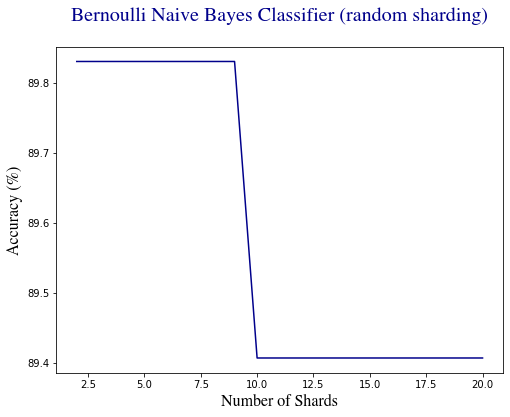

In [145]:
#initializations
BernoulliNB_acc_random_16 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=16)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_random_16.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, BernoulliNB_acc_random_16, 'Bernoulli Naive Bayes Classifier (random sharding)\n')

**Bernoulli NB Classifier (random sharding) - number of slices = 32**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - random sharding): 89.41%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - random sharding): 89.41%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - random sharding): 89.41%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - random shardi

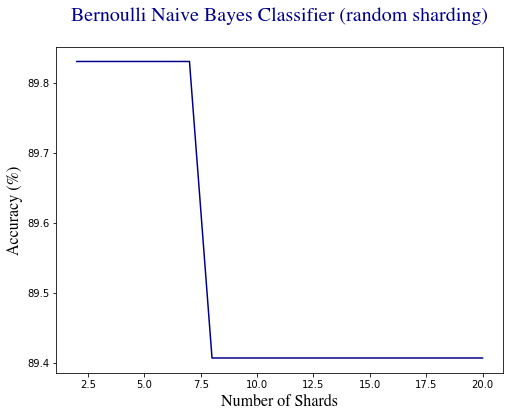

In [146]:
#initializations
BernoulliNB_acc_random_32 = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=32)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_random_32.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, BernoulliNB_acc_random_32, 'Bernoulli Naive Bayes Classifier (random sharding)\n')

**Bernoulli NB Classifier (random sharding) - number of slices = size of shard**

Accuracy on test set for the 2 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 3 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 4 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 5 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 6 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 7 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 8 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 9 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 10 shards of dataset (Bernoulli NB Classifier - random sharding): 89.83%
Accuracy on test set for the 11 shards of dataset (Bernoulli NB Classifier - random shardi

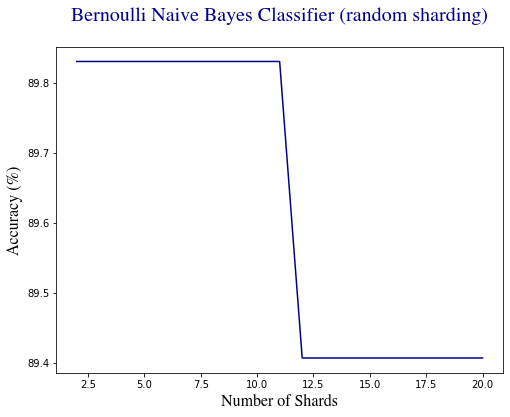

In [147]:
#initializations
BernoulliNB_acc_random_full = list()
X_train, X_test, y_train, y_test = spliting_data(data)

#try from 2 to 20 shards
for n_shards in r:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'random')
    clf_models = [BernoulliNB() for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_random_full.append(acc*100)
    print_accuracy('{} shards of dataset (Bernoulli NB Classifier - random sharding)'.format(n_shards), acc)
    
plot_results(r, BernoulliNB_acc_random_full, 'Bernoulli Naive Bayes Classifier (random sharding)\n')

# Comparision between Fixed and Random Sharding

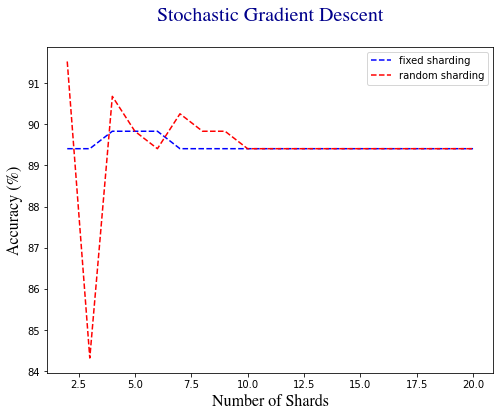

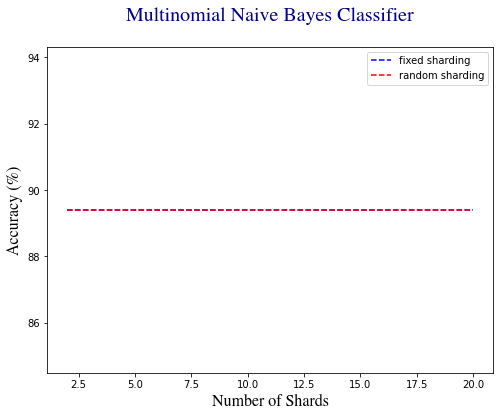

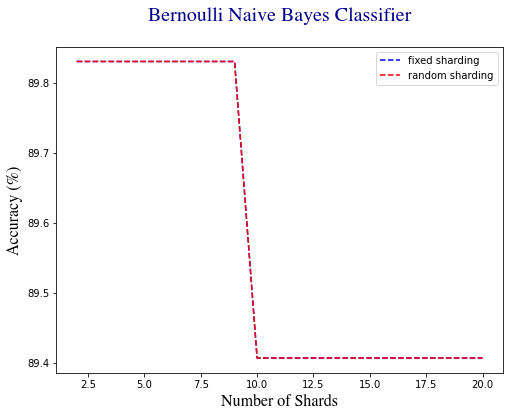

In [79]:
plot_comparision_FR(r, SGD_acc_fixed_full, SGD_acc_random_full , 'Stochastic Gradient Descent\n')
plot_comparision_FR(r, MultinomialNB_acc_fixed_full, MultinomialNB_acc_random_full , 'Multinomial Naive Bayes Classifier\n')
plot_comparision_FR(r, BernoulliNB_acc_fixed_full, BernoulliNB_acc_random_full , 'Bernoulli Naive Bayes Classifier\n')

# The relationship between the number of sharding and slicing

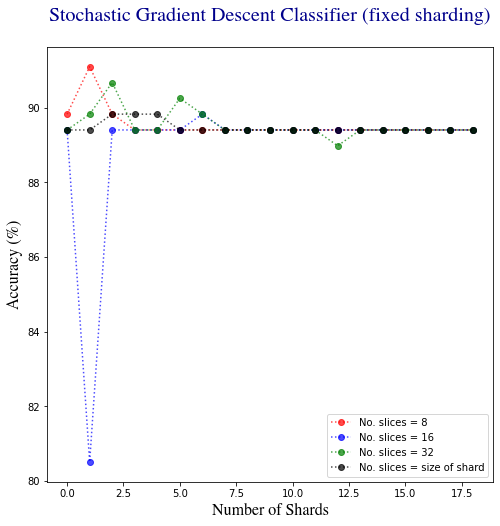

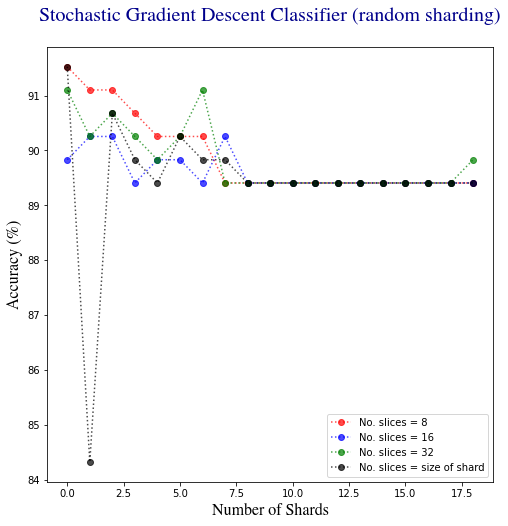

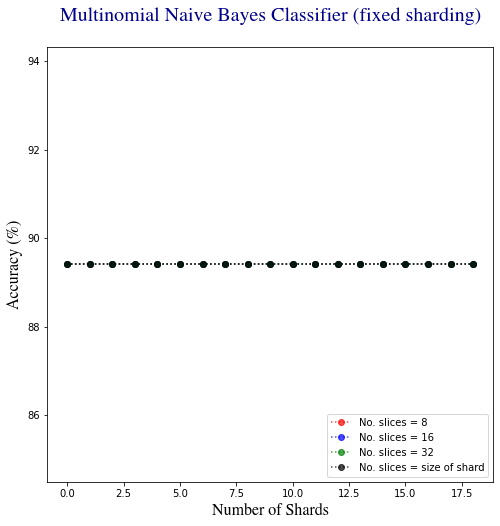

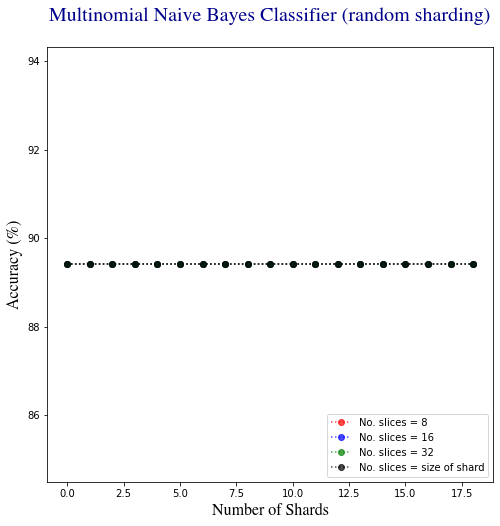

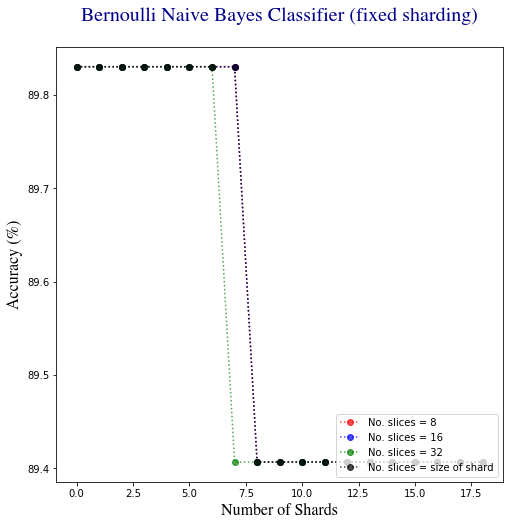

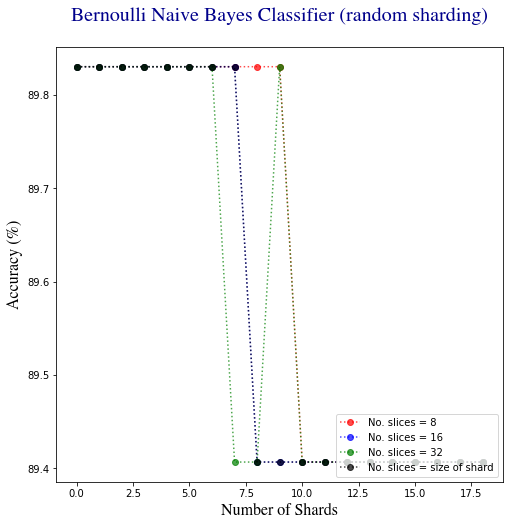

In [80]:
plot_comparision_SS(range(19), SGD_acc_fixed_8,
                    SGD_acc_fixed_16, SGD_acc_fixed_32, SGD_acc_fixed_full
                    , 'Stochastic Gradient Descent Classifier (fixed sharding)\n')

plot_comparision_SS(range(19), SGD_acc_random_8,
                    SGD_acc_random_16, SGD_acc_random_32, SGD_acc_random_full
                    , 'Stochastic Gradient Descent Classifier (random sharding)\n')

plot_comparision_SS(range(19), MultinomialNB_acc_fixed_8,
                    MultinomialNB_acc_fixed_16, MultinomialNB_acc_fixed_32, MultinomialNB_acc_fixed_full
                    , 'Multinomial Naive Bayes Classifier (fixed sharding)\n')

plot_comparision_SS(range(19), MultinomialNB_acc_random_8,
                    MultinomialNB_acc_random_16, MultinomialNB_acc_random_32, MultinomialNB_acc_random_full
                    , 'Multinomial Naive Bayes Classifier (random sharding)\n')

plot_comparision_SS(range(19), BernoulliNB_acc_fixed_8,
                    BernoulliNB_acc_fixed_16, BernoulliNB_acc_fixed_32, BernoulliNB_acc_fixed_full
                    , 'Bernoulli Naive Bayes Classifier (fixed sharding)\n')

plot_comparision_SS(range(19), BernoulliNB_acc_random_8,
                    BernoulliNB_acc_random_16, BernoulliNB_acc_random_32, BernoulliNB_acc_random_full
                    , 'Bernoulli Naive Bayes Classifier (random sharding)\n')

# The impact of Hyper-parameters on SGD Classifier

**the impact of alpha**

In [152]:
alpha=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
n_shards=2
n_slices=16
SGD_acc_alpha = list()
X_train, X_test, y_train, y_test = spliting_data(data)

for a in alpha:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [SGDClassifier(loss = 'log', alpha=a) for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    SGD_acc_alpha.append(acc*100)
    print_accuracy('Accuracy of SGD classifier with alpha = {}'.format(a), acc)


Accuracy on test set for the Accuracy of SGD classifier with alpha = 1.0: 89.41%
Accuracy on test set for the Accuracy of SGD classifier with alpha = 0.5: 89.41%
Accuracy on test set for the Accuracy of SGD classifier with alpha = 0.1: 89.41%
Accuracy on test set for the Accuracy of SGD classifier with alpha = 0.05: 89.41%
Accuracy on test set for the Accuracy of SGD classifier with alpha = 0.01: 89.41%
Accuracy on test set for the Accuracy of SGD classifier with alpha = 0.005: 89.41%
Accuracy on test set for the Accuracy of SGD classifier with alpha = 0.001: 91.10%


**the impact of regularization**

In [159]:
n_shards=2
n_slices=16
reg='l1'
X_train, X_test, y_train, y_test = spliting_data(data)

X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
clf_models = [SGDClassifier(loss = 'log', penalty=reg) for i in range(n_shards)]
weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices)
pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
print_accuracy('Accuracy of SGD classifier with regularization = {}'.format(reg), acc)


Accuracy on test set for the Accuracy of SGD classifier with regularization = l1: 91.10%


# The impact of Hyper-parameters on MultinomialNB  Classifier

**the impact of alpha**

In [160]:
alpha=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
n_shards=2
n_slices=16
MultinomialNB_acc_alpha = list()
X_train, X_test, y_train, y_test = spliting_data(data)

for a in alpha:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [MultinomialNB(alpha=a) for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    MultinomialNB_acc_alpha.append(acc*100)
    print_accuracy('Accuracy of Multinomial NB classifier with alpha = {}'.format(a), acc)



Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 1.0: 89.41%
Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 0.5: 89.41%
Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 0.1: 89.41%
Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 0.05: 89.41%
Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 0.01: 89.41%
Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 0.005: 89.41%
Accuracy on test set for the Accuracy of Multinomial NB classifier with alpha = 0.001: 89.41%


# The impact of Hyper-parameters on BernoulliNB  Classifier

**the impact of alpha**

In [163]:
alpha=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
n_shards=3
BernoulliNB_acc_alpha = list()
X_train, X_test, y_train, y_test = spliting_data(data)

for a in alpha:
    X_train_shards, y_train_shards, X_val_shards, y_val_shards = sharding(n_shards, X_train, y_train, 'fixed')
    clf_models = [BernoulliNB(alpha=a) for i in range(n_shards)]
    weights, clf_models = weights_estimate(clf_models, X_train_shards, X_val_shards, y_train_shards, y_val_shards, n_slices=y_train_shards[0].size)
    pred, acc = ensemble_prediction(clf_models, weights, X_test, y_test)
    BernoulliNB_acc_alpha.append(acc*100)
    print_accuracy('Accuracy of Bernoulli NB classifier with alpha = {}'.format(a), acc)



Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 1.0: 89.83%
Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 0.5: 89.83%
Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 0.1: 89.83%
Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 0.05: 89.83%
Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 0.01: 89.83%
Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 0.005: 89.83%
Accuracy on test set for the Accuracy of Bernoulli NB classifier with alpha = 0.001: 89.83%
